<div class="alert alert-block alert-success">
<h1>Tile and Trouble</h1>
<h4>MAY 2014: PUZZLE</h4>
</div>

<img src="https://www.janestreet.com/puzzles/TileAndTrouble.png" width=720 height=35 />

The puzzle was publised at https://www.janestreet.com/puzzles/tile-and-trouble-index/

Add square tiles to the 12-by-12 grid so that the total points in each row and each column matches the corresponding value outside the grid.

* A tile can have any side length (e.g., 1-by-1, 2-by-2, 3-by-3, etc.)
* Every cell within an n-by-n tile is worth n points.
* Tiles may not overlap. Not every cell in the 12-by-12 grid needs to be inside one of the tiles.
* For your answer, submit the product of the areas of each contiguous empty space in the solved grid (along with any other comments you want to provide)

<div class="alert alert-block alert-warning">
    <h1>Break down the problem</h1>
</div>

This puzzle involves adding square tiles to a 12x12 grid so that the total points in each row and each column match the given border values.
In the example the total points:
* In the first row is,
1 + 1 + 2 + 2 + 1 + 1 = 8
* In the first column is,
1 + 2 + 2 + 1 + 3 + 3 + 3 = 15

**Three important requirements**:

* The tile can have different size such as 1-by-1, 2-by-2, 3-by-3, etc., and the values in each cell within a tile are the same.
* Each cell within an n-by-n tile is worth n points.
* Tiles cannot overlap. It means that not every cell in the 12-by-12 grid is found inside other tiles.

**Submission**:

Find the product of the areas of empty spaces. According to the instance, there are 5 empty spaces in the 12x12 grid. They are **3** 1x1 grids, a L-shaped tile (trominoes) = **4** 1x1 grid, and an 1x2 grid corresponding to **2** 1x1 grid. Each 1x1 grid will equal to 1 unit area. Thus, we obtained,
4 * 2 * 1 * 1 * 1 = 8

## Implies in z3

**Implies** is a Boolean operator supported by z3 in Python. It requires two boolean expressions and returns a boolean expression that represents the logical implication of the two inputs. 

In formal logic, the implication (->) is a binary connective that produces a **False** value only if its first operand is True and its second operand is False. The truth table for implication is as follows:

| A | B | A -> B |
|---|---|--------|
| 0 | 0 |   1    |
| 0 | 1 |   1    |
| 1 | 0 |   0    |
| 1 | 1 |   1    |


In Z3, the "implies" operator is denoted by **Implies**. Here's how you can use it in Python with z3:

In [8]:
from z3 import *

# Create a Z3 solver instance
solver = Solver()

# Define boolean variables
A = Bool('A')
B = Bool('B')

# Iterate through all possible combinations of A and B
all_cases = []
for a_val in [True, False]:
    for b_val in [True, False]:
        # Set the values for A and B
        a_implies_b_formula = Implies(BoolVal(a_val), BoolVal(b_val))

        # Add the implication to the solver
        solver.push()
        solver.add(a_implies_b_formula)

        # Check if A implies B is satisfied
        if solver.check() == sat:
            model = solver.model()
            all_cases.append((a_val, b_val, "Satisfiable"))
        else:
            all_cases.append((a_val, b_val, "Unsatisfiable"))

        # Pop the added constraints
        solver.pop()

# Print all cases
print("All cases (A, B, Satisfiability):")
for a_val, b_val, satisfiability in all_cases:
    print(f"A = {a_val}, B = {b_val}, Satisfiability: {satisfiability}")

All cases (A, B, Satisfiability):
A = True, B = True, Satisfiability: Satisfiable
A = True, B = False, Satisfiability: Unsatisfiable
A = False, B = True, Satisfiability: Satisfiable
A = False, B = False, Satisfiability: Satisfiable


<div class="alert alert-info">
  <h1>Solution</h1>
</div>

In [137]:
import numpy as np
import time
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
from z3 import *

In [145]:
# The numbers outside the rows.
row_labels = [12,17,43,44,34,42,43,21,36,29,30,26]
# The numbers outside the columns.
col_labels = [30,35,45,43,41,28,25,29,25,38,18,20]

In [189]:
size = 12
nums = 6

In [190]:
# Setup up a 12x12 matrix of integer variables and solver 
X = [[Int("s%d%d" % (i+1,j+1)) for j in range (size)] for i in range (size)]
s = Solver()

In [191]:
# each cell contains a value in {1, ..., 6} because the biggest outside number is 45 while 7x7 = 49 > 45
s += [And(X[i][j]>=0,X[i][j]<=nums) for j in range (size) for i in range(size)]

In [192]:
for n in range(size):
    s += Sum([X[n][j] for j  in range(size)]) == row_labels[n] #Sum values in the row to get the value equal to the corresponding given border value.
    s += Sum([X[i][n] for i  in range(size)]) == col_labels[n] #Sum values in the column to get the value equal to the corresponding given border value.

In [193]:
#Now let make a loop to slice the n-by-n tiles in 12x12 grid.
for i,j in itertools.product(range(size),range(size)):
      
    # Slice the 2-by-2 tiles
    # Along rows
    if i == 1 :
        s += [Implies(X[i-1][j] == n,X[i][j] == n) for n in range(nums) if n > 1]
    elif i > 1 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] != n),X[i][j] == n) for n in range(nums+1) if n > 1 ] 
    #Along columns
    if j == 1 :
        s += [Implies(X[i][j-1] == n,X[i][j] == n) for n in range(nums) if n > 1]
    elif j > 1 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] != n),X[i][j] == n) for n in range(nums+1) if n > 1 ]
        

    # Slice the 3-by-3 tiles
    # Along rows
    if i == 2:
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n),X[i][j] == n) for n in range(nums+1) if n > 2 ]    
    elif i > 2 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] != n),X[i][j] == n) for n in range(nums+1) if n > 2 ] 
    #Along columns
    if j == 2:
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n),X[i][j] == n) for n in range(nums+1) if n > 2 ]    
    elif j > 2 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3] != n),X[i][j] == n) for n in range(nums+1) if n > 2 ] 
        
    # Slice the 4-by-4 tiles
    # Along rows
    if i == 3:
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n),X[i][j] == n) for n in range(nums+1) if n > 3 ]    
    elif i > 3 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-4][j] != n),X[i][j] == n) for n in range(nums+1) if n > 3 ] 
    # Along columns
    if j == 3:
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3] == n),X[i][j] == n) for n in range(nums+1) if n > 3 ]    
    elif j > 3 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3] == n, X[i][j-4] != n),X[i][j] == n) for n in range(nums+1) if n > 3 ]
        
        
    # Slice the 5-by-5 tiles
    # Along rows
    if i == 4:
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-4][j] == n),X[i][j] == n) for n in range(nums+1) if n > 4 ]    
    elif i > 4 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-4][j] == n,X[i-5][j] != n),X[i][j] == n) for n in range(nums+1) if n > 4 ]  
    # Along columns
    if j == 4:
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3] == n,X[i][j-4] == n),X[i][j] == n) for n in range(nums+1) if n > 4 ]    
    elif j > 4 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3] == n,X[i][j-4] == n,X[i][j-5] != n),X[i][j] == n) for n in range(nums+1) if n > 4 ] 
        
        
    # Slice the 6-by-6 tiles
    # Along rows
    if i == 5:
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-4][j] == n,X[i-5][j] == n),X[i][j] == n) for n in range(nums+1) if n > 5 ]    
    elif i > 5 :   
        s += [Implies(And(X[i-1][j] == n,X[i-2][j] == n,X[i-3][j] == n,X[i-4][j] == n,X[i-5][j] == n,X[i-6][j] != n),X[i][j] == n) for n in range(nums+1) if n > 5 ]  
    # Along columns
    if j == 5:
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n ,X[i][j-3] == n,X[i][j-4] == n,X[i][j-5] == n),X[i][j] == n) for n in range(nums+1) if n > 5 ]    
    elif j > 5 :   
        s += [Implies(And(X[i][j-1] == n,X[i][j-2] == n,X[i][j-3] == n,X[i][j-4] == n, X[i][j-5] == n,X[i][j-6] != n),X[i][j] == n) for n in range(nums+1) if n > 5 ] 

Solved in 1.7759819030761719 seconds


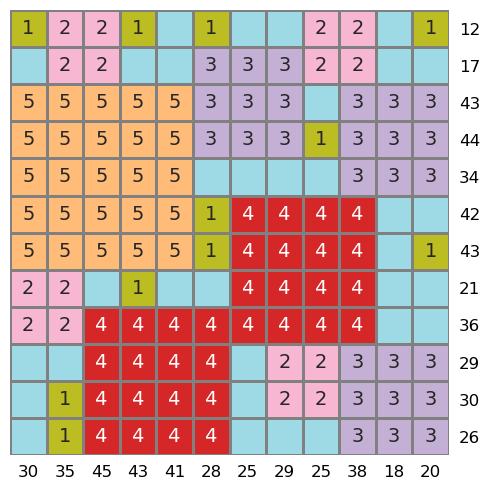

In [194]:
start = time.time()
if s.check() == sat:
    print("Solved in {} seconds".format(time.time()-start))
    m = s.model()
    out = np.array([ [ m.evaluate(X[i][j]).as_long() for j in range(size) ] for i in range(size) ])
    x = np.copy(out)
    x = x.astype('int').astype('str')
    x[x=="0"] = ""
    fig,ax = plt.subplots(1,1,figsize=(5,5))    
    ax =sns.heatmap(out,annot=x,cbar=False,center=3,cmap="tab20_r",fmt="",linewidths=1,linecolor="grey",annot_kws={"size":14},
                    xticklabels=col_labels, yticklabels=row_labels)
    ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
    plt.xticks(rotation=0,fontsize =12)
    plt.yticks(rotation=0,fontsize =12)
    plt.tight_layout()
    plt.show()   
     
else:
    print("No solution in {} seconds".format(time.time()-start))

<div class="alert alert-info">
  <h1>Public Solution</h1>
</div>

In [ ]:
<img src="https://www.janestreet.com/puzzles/Feb14_Solution.png" width=720 height=50 />

The BEST SOLUTION was publised at https://www.janestreet.com/puzzles/hooks-solution/